<a href="https://colab.research.google.com/github/tvani2/Walmart-Recruiting---Store-Sales-Forecasting/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install kaggle
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/cs231n/assignments/finalproject/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c walmart-recruiting-store-sales-forecasting
! unzip walmart-recruiting-store-sales-forecasting.zip
!unzip features.csv.zip
!unzip train.csv.zip
!unzip test.csv.zip
!unzip sampleSubmission.csv.zip

Mounted at /content/drive
  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 590MB/s]
Archive:  walmart-recruiting-store-sales-forecasting.zip
  inflating: features.csv.zip        
  inflating: sampleSubmission.csv.zip  
  inflating: stores.csv              
  inflating: test.csv.zip            
  inflating: train.csv.zip           
Archive:  features.csv.zip
  inflating: features.csv            
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  sampleSubmission.csv.zip
  inflating: sampleSubmission.csv    


In [3]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

In [4]:
df_train = pd.merge(train, stores, on='Store', how='left')
df_train = pd.merge(df_train, features, on=['Store', 'Date', 'IsHoliday'], how='left')

# Convert Date column to datetime objects
df_train['Date'] = pd.to_datetime(df_train['Date'])

print("Train Data Shape:", df_train.shape)
df_train.head()

Train Data Shape: (421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [5]:
print("Percentage of NaN values per column in df_train:")
print(df_train.isnull().sum() * 100 / len(df_train))

Percentage of NaN values per column in df_train:
Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
dtype: float64


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

Date სვეტი გადავაკეთეთ **datetime** ტიპად.

MarkDown სვეტებში ბევრი **NaN მნიშვნელობა** გვაქვს, რაც ნიშნავს, რომ სავარაუდოდ იმ კვირას ფასდაკლება არ იყო. ამ მნიშვნელობებს შევავსებთ 0-ით.


In [7]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Plots

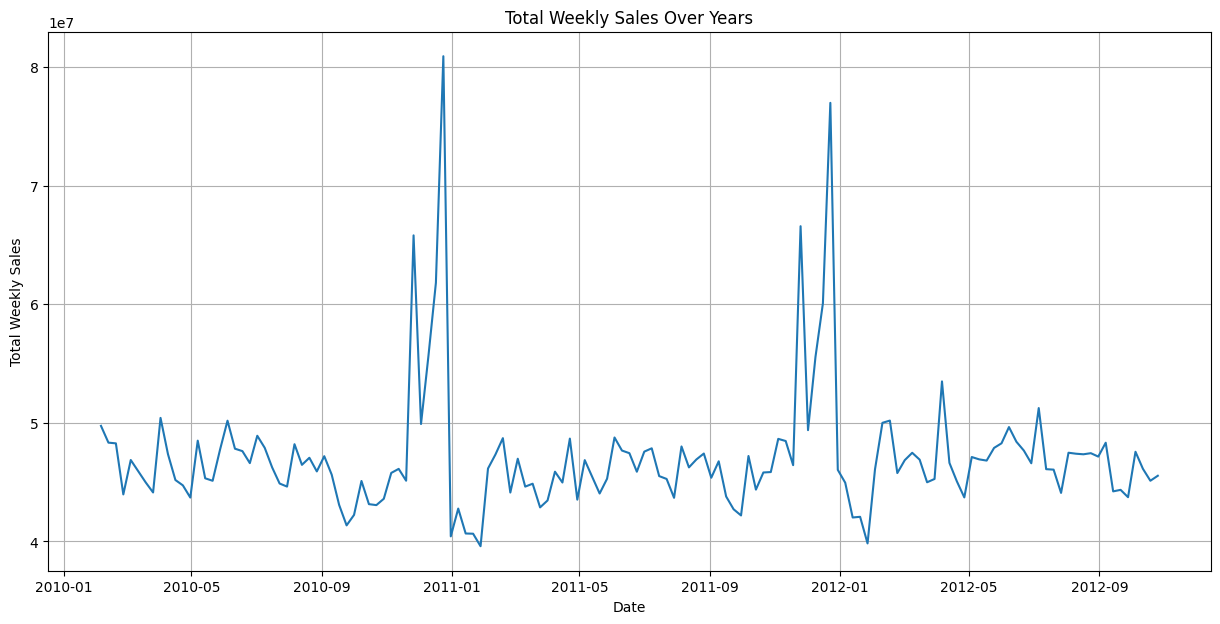

Approximate month of the highest peaks:
Peak Date: 2010-12-24
Peak Date: 2011-12-23


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by date and sum weekly sales
weekly_sales = df_train.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plotting Total Weekly Sales Over Time
plt.figure(figsize=(15, 7))
sns.lineplot(data=weekly_sales, x='Date', y='Weekly_Sales')
plt.title('Total Weekly Sales Over Years')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

# Find the peaks
from scipy.signal import find_peaks

peaks, _ = find_peaks(weekly_sales['Weekly_Sales'], distance=50) # Distance can be adjusted

print("Approximate month of the highest peaks:")

# Sort peaks by sales value in descending order and get the top 4
top_peak_indices = weekly_sales['Weekly_Sales'].iloc[peaks].nlargest(4).index

# Get the dates for these top peaks and extract the month
for index in top_peak_indices:
    peak_date = weekly_sales['Date'].iloc[index]
    print(f"Peak Date: {peak_date.strftime('%Y-%m-%d')}")


**ზოგადი ტრენდი**: ტენდენცია ძირითადად სტაბილურია, რომელიც 40 მილიონი დოლარიდან 50 მილიონ დოლარამდე მერყეობს, არ შეინიშნება მკაფიო გრძელვადიანი აღმავალი ან დაღმავალი მოძრაობა, გარდა რამდენიმე მნიშვნელოვანი პიკისა.

**სეზონურობა**: სეზონური პიკები ჩანს ნოემბერსა და დეკემბერში, როგორც 2010, ასევე 2011 წლებში. ეს, სავარაუდოდ, thanksgiving-სა და შობას ემთხვევა. პიკი ხანმოკლე და სეზონურია, მყისიერად ეცემა ჩვეულებრივ დონემდე.

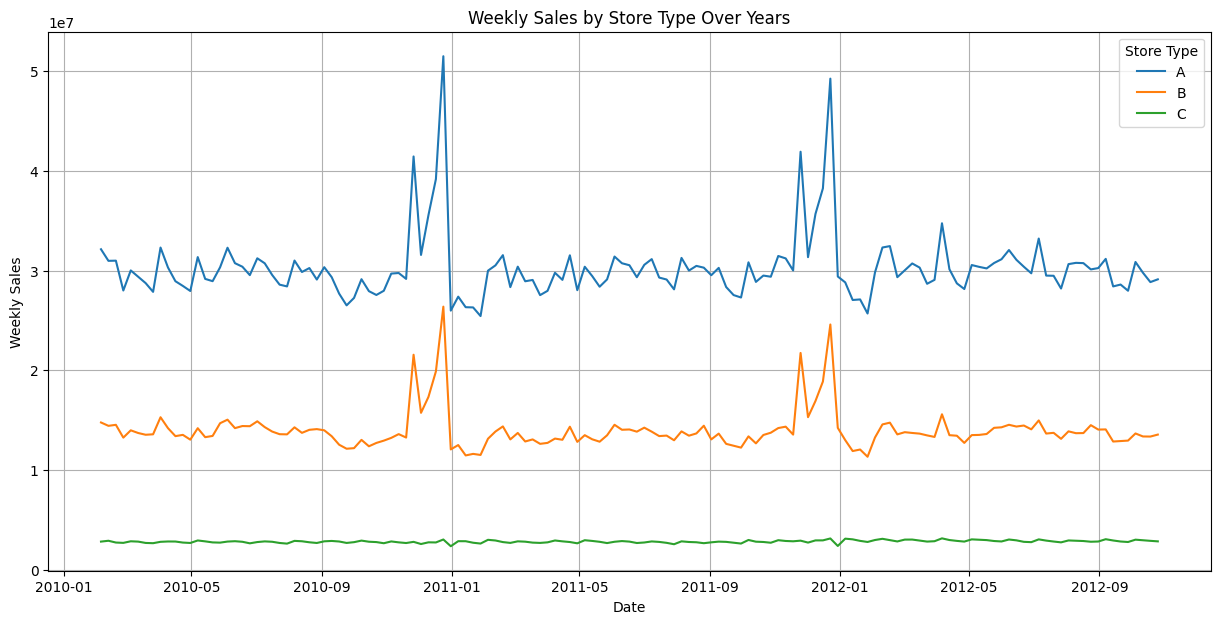

In [18]:
# Group by store type and date and sum weekly sales
weekly_sales_by_store_type = df_train.groupby(['Type', 'Date'])['Weekly_Sales'].sum().reset_index()

# Plotting Weekly Sales for each Store Type Over Time
plt.figure(figsize=(15, 7))
sns.lineplot(data=weekly_sales_by_store_type, x='Date', y='Weekly_Sales', hue='Type')
plt.title('Weekly Sales by Store Type Over Years')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.legend(title='Store Type')
plt.show()

Percentage of stores per type:
Type
A    48.888889
B    37.777778
C    13.333333
Name: count, dtype: float64


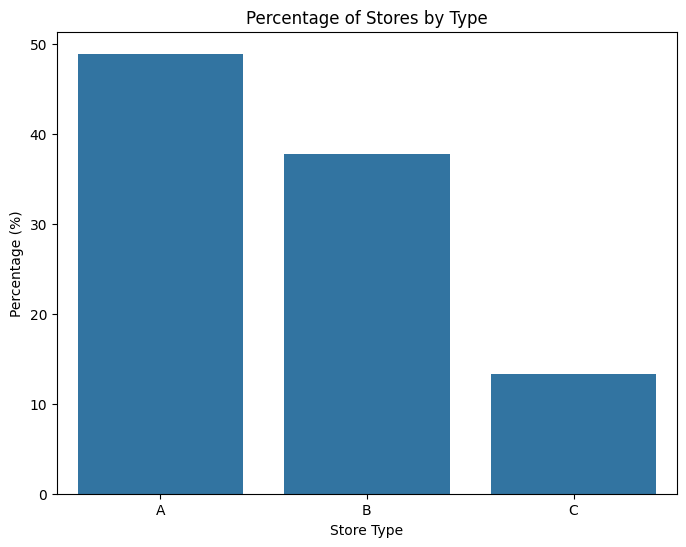

In [22]:
# Calculate the percentage of stores for each type
store_type_counts = stores['Type'].value_counts()
store_type_percentages = store_type_counts / store_type_counts.sum() * 100

print("Percentage of stores per type:")
print(store_type_percentages)

# Optional: Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=store_type_percentages.index, y=store_type_percentages.values)
plt.title('Percentage of Stores by Type')
plt.xlabel('Store Type')
plt.ylabel('Percentage (%)')
plt.show()

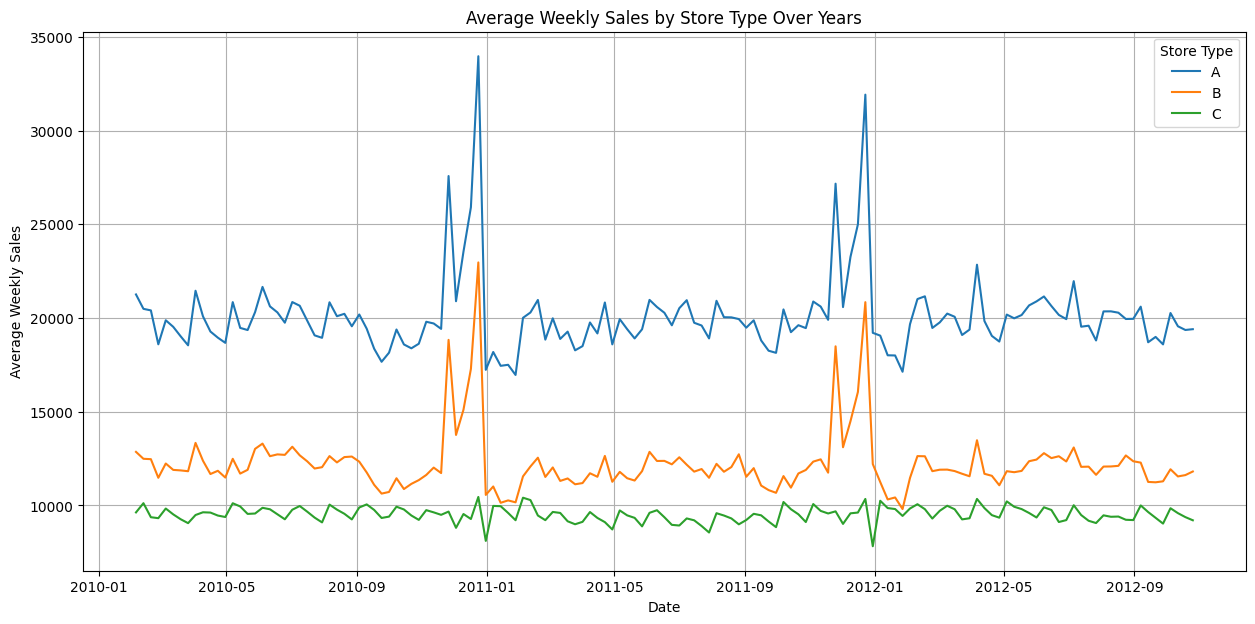

In [23]:
# Group by store type and date and calculate the average weekly sales
average_weekly_sales_by_store_type = df_train.groupby(['Type', 'Date'])['Weekly_Sales'].mean().reset_index()

# Plotting Average Weekly Sales for each Store Type Over Time
plt.figure(figsize=(15, 7))
sns.lineplot(data=average_weekly_sales_by_store_type, x='Date', y='Weekly_Sales', hue='Type')
plt.title('Average Weekly Sales by Store Type Over Years')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.legend(title='Store Type')
plt.show()

როგორც ვხედავთ, A ტიპის მაღაზია ლიდერობს გაყიდვებით, შემდეგ B და ბოლოს - C. პროცენტული გადანაწილებაც მსგავსია. შეიძლება ეს გამოწვეული ყოფილიყო ჯამურად მაღაზიების რაოდენობის სიჭარბით, მაგრამ საშუალო მონაცემებითაც A > B > C. A-სა და B-ში ნოემბერ-დეკემბერში აღინიშნება გაყიდვების დიდი მატება, რასაც ვერ ვიტყვით C ტიპზე.

**დასკვნა**: მაღაზიის ტიპი მნიშვნელოვანი ფიჩერია.

In [21]:
df_train['Weekly_Sales'].describe()

,Weekly_Sales
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000


Top 15 Departments Based on Average Weekly Sales:
    Dept  Weekly_Sales
73    92  75204.870531
76    95  69824.423080
36    38  61090.619568
60    72  50566.515417
57    65  45441.706224
71    90  45232.084488
38    40  44900.702727
1      2  43607.020113
72    91  33687.910758
75    94  33405.883963
12    13  30663.802634
7      8  30191.263517
74    93  27008.060746
3      4  25974.630238
6      7  24161.237413


/tmp/ipython-input-24-982831889.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dept', y='Weekly_Sales', data=top_departments.head(15), palette='viridis')


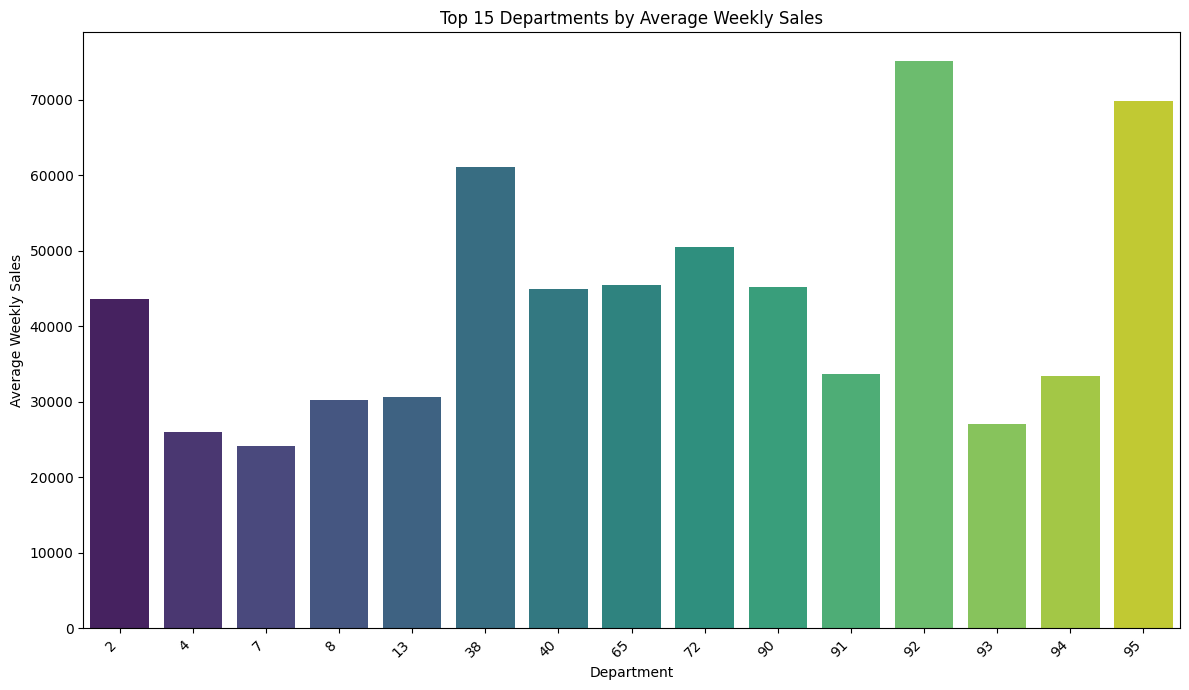

In [24]:
# Group by Department and calculate the average weekly sales
department_avg_sales = df_train.groupby('Dept')['Weekly_Sales'].mean().reset_index()

# Sort departments by average weekly sales in descending order
top_departments = department_avg_sales.sort_values(by='Weekly_Sales', ascending=False)

# Display the top 15 departments
print("Top 15 Departments Based on Average Weekly Sales:")
print(top_departments.head(15))

# Optional: Plot the top 15 departments
plt.figure(figsize=(12, 7))
sns.barplot(x='Dept', y='Weekly_Sales', data=top_departments.head(15), palette='viridis')
plt.title('Top 15 Departments by Average Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


5 Least Profitable Departments Based on Average Weekly Sales:
    Dept  Weekly_Sales
45    47     -7.682554
41    43      1.193333
63    78      7.296638
37    39     11.123750
49    51     21.931729


/tmp/ipython-input-27-3457896316.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dept', y='Weekly_Sales', data=least_profitable_departments.head(5), palette='viridis')


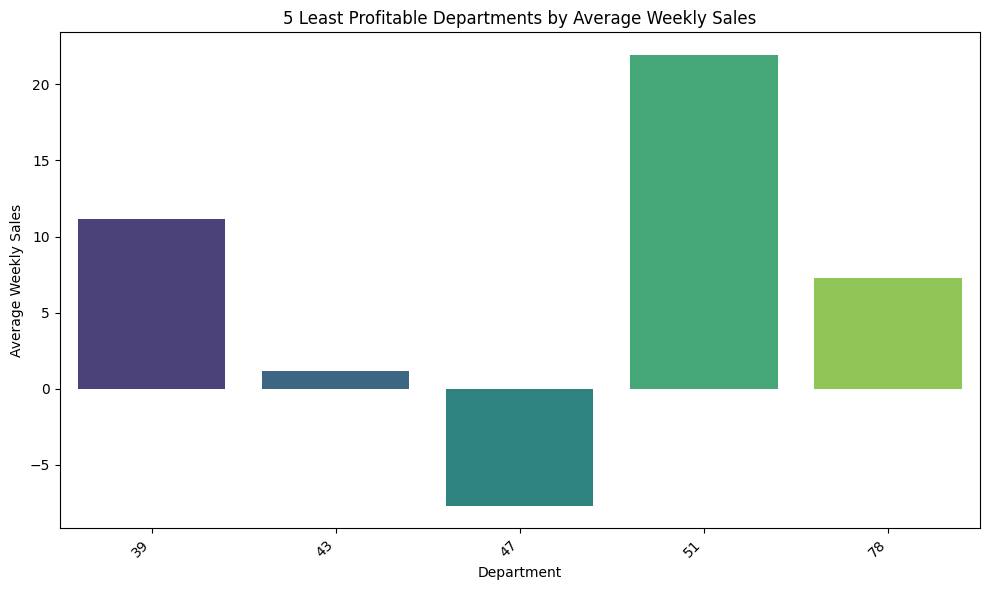

In [27]:
# Sort departments by average weekly sales in ascending order
least_profitable_departments = department_avg_sales.sort_values(by='Weekly_Sales', ascending=True)

# Display the 5 least profitable departments
print("\n5 Least Profitable Departments Based on Average Weekly Sales:")
print(least_profitable_departments.head(5))

# Optional: Plot the 5 least profitable departments
plt.figure(figsize=(10, 6))
sns.barplot(x='Dept', y='Weekly_Sales', data=least_profitable_departments.head(5), palette='viridis')
plt.title('5 Least Profitable Departments by Average Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

აღმოჩნდა, რომ **დეპარტამენტებსაც** დიდი მნიშვნელობა აქვს შემოსავლის თვალსაზრისით.  92-ე ყოველკვირეულად საშუალოდ 75 ათასს ყიდის, ხოლო 47-ში weekly sales გვაქვს უარყოფითი - რაც საქონლის დაბრუნებას ნიშნავს.

Total Sales in 2010: 2,288,886,120.41
Total Sales in 2011: 2,448,200,007.35
Total Sales in 2012: 2,000,132,859.35


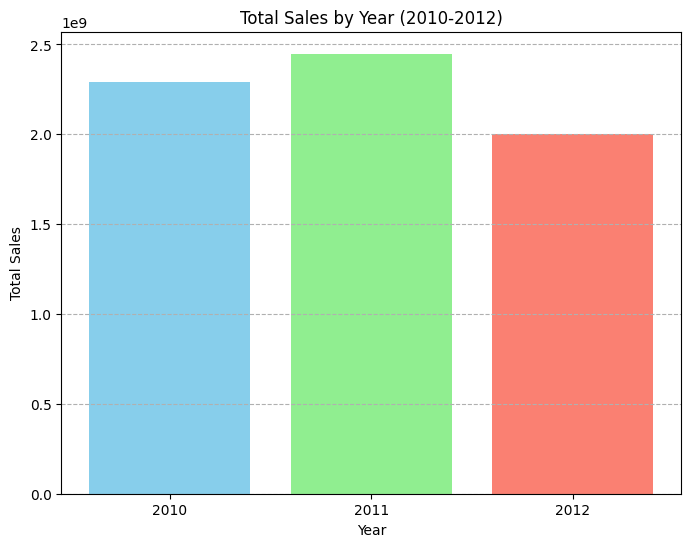

In [28]:
# Calculate total sales for each year
yearly_sales = df_train.groupby(df_train['Date'].dt.year)['Weekly_Sales'].sum()

# Extract sales for 2010, 2011, and 2012
sales_2010 = yearly_sales.get(2010, 0)
sales_2011 = yearly_sales.get(2011, 0)
sales_2012 = yearly_sales.get(2012, 0)

print(f"Total Sales in 2010: {sales_2010:,.2f}")
print(f"Total Sales in 2011: {sales_2011:,.2f}")
print(f"Total Sales in 2012: {sales_2012:,.2f}")

# Optional: Plot the yearly sales
plt.figure(figsize=(8, 6))
years = [2010, 2011, 2012]
sales_values = [sales_2010, sales_2011, sales_2012]
plt.bar(years, sales_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Total Sales by Year (2010-2012)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(years)
plt.grid(axis='y', linestyle='--')
plt.show()

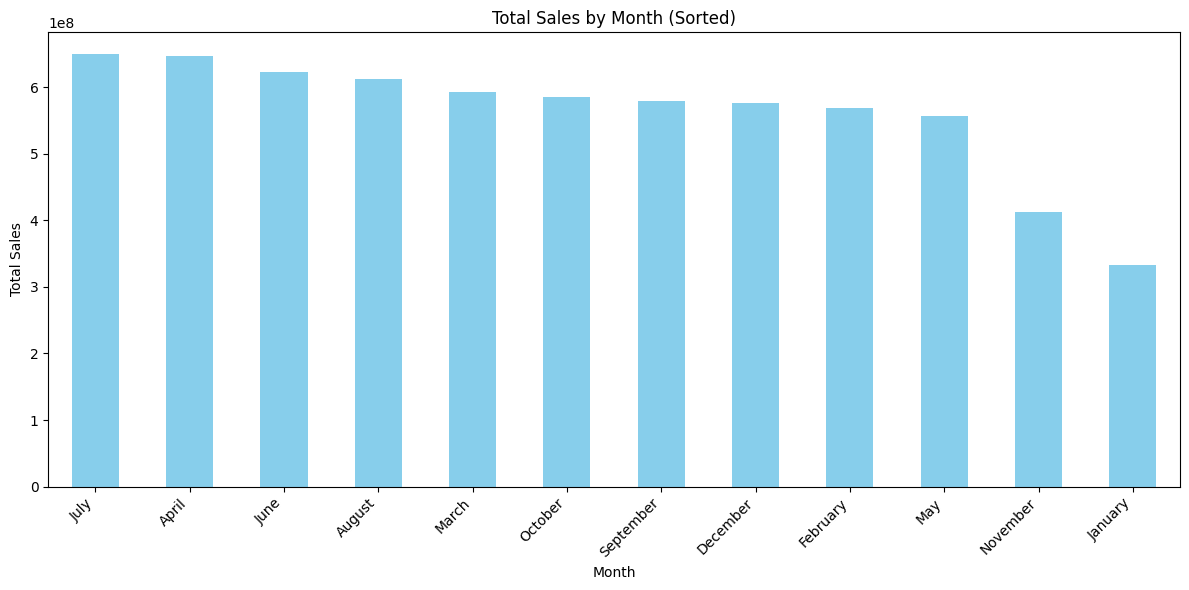

In [30]:
# Sort the monthly sales for plotting
monthly_sales_sorted = monthly_sales.sort_values(ascending=False)

# Plot the monthly sales sorted
plt.figure(figsize=(12, 6))
monthly_sales_sorted.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ჯამურად, ივლისის თვეში ყველაზე დიდი შემოსავალი გვაქვს. მიუხედავად იმისა, რომ დეკემბერში გვქონდა პიკი, ის მერვე ადგილზეა. ეს სავარაუდოდ გამოწვეულია იმით, რომ დეკემბერი მოკლევადიანი პიკებითა და მაღალი ვარიაციით ხასიათდება, ხოლო ივლისში სტაბილურად მაღალი ყოველკვირეული გაყიდვებია, რაც ყოველთვიური ჯამური მაჩვენებლების ზრდას იწვევს.

Average Weekly Sales on Holiday Weeks: 17,035.82
Average Weekly Sales on Non-Holiday Weeks: 15,901.45


/tmp/ipython-input-31-51667917.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Holiday', 'Non-Holiday'], y=[average_sales_holiday, average_sales_non_holiday], palette='coolwarm')


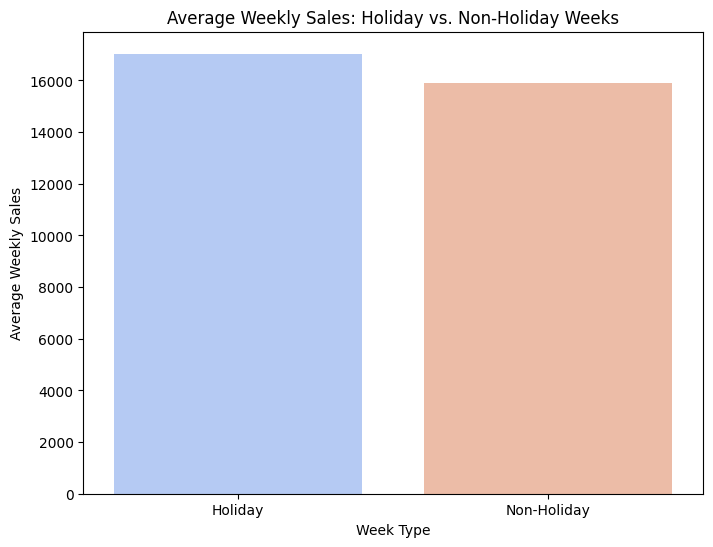

In [31]:
# Calculate the average weekly sales for holiday and non-holiday weeks
average_sales_holiday = df_train[df_train['IsHoliday'] == True]['Weekly_Sales'].mean()
average_sales_non_holiday = df_train[df_train['IsHoliday'] == False]['Weekly_Sales'].mean()

print(f"Average Weekly Sales on Holiday Weeks: {average_sales_holiday:,.2f}")
print(f"Average Weekly Sales on Non-Holiday Weeks: {average_sales_non_holiday:,.2f}")

# Optional: Plot the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Holiday', 'Non-Holiday'], y=[average_sales_holiday, average_sales_non_holiday], palette='coolwarm')
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday Weeks')
plt.xlabel('Week Type')
plt.ylabel('Average Weekly Sales')
plt.show()

Average Weekly Sales on Specific Holidays:
Thanksgiving    22220.94
Super Bowl      16378.00
Labor Day       15881.69
Christmas       14543.39
dtype: float64


/tmp/ipython-input-33-2575246472.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_profitable_holidays.index, y=most_profitable_holidays.values, palette='viridis')


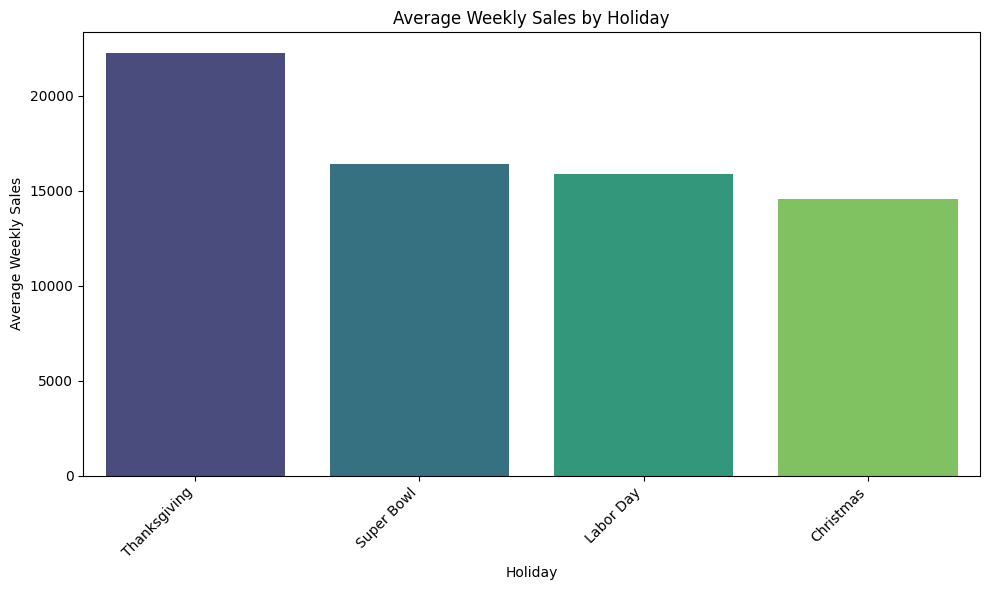

In [33]:
holiday_dates = {
    'Super Bowl': ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'],
    'Labor Day': ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'],
    'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'],
    'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']
}

# Convert holiday dates to datetime objects
for holiday, dates in holiday_dates.items():
    holiday_dates[holiday] = pd.to_datetime(dates)

holiday_sales = {}

for holiday, dates in holiday_dates.items():
    # Filter the training data for the specific holiday dates
    holiday_df = df_train[df_train['Date'].isin(dates)]
    # Calculate the average weekly sales for these dates
    average_sales = holiday_df['Weekly_Sales'].mean()
    holiday_sales[holiday] = average_sales

# Convert the results to a pandas Series for easy sorting and plotting
holiday_sales_series = pd.Series(holiday_sales)

# Sort holidays by average sales in descending order
most_profitable_holidays = holiday_sales_series.sort_values(ascending=False)

print("Average Weekly Sales on Specific Holidays:")
print(most_profitable_holidays.round(2))

# Optional: Plot the average sales by holiday
plt.figure(figsize=(10, 6))
sns.barplot(x=most_profitable_holidays.index, y=most_profitable_holidays.values, palette='viridis')
plt.title('Average Weekly Sales by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

გაყიდვები დალაგებულია დღესასწაულების მიხედვით. მადლიერების კვირაში დაახლოებით 5 ათასით მეტი პროდუქტი იყიდება ვიდრე super bowl-ზე. ამიტომ დამატებით ფიჩერებს შემოვიტანთ კონკრეტული დღესასწაულის იდენტიფიკაციისთვის.


Correlation of Weekly_Sales with External Features:
Weekly_Sales    1.000000
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown2       0.020716
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Name: Weekly_Sales, dtype: float64


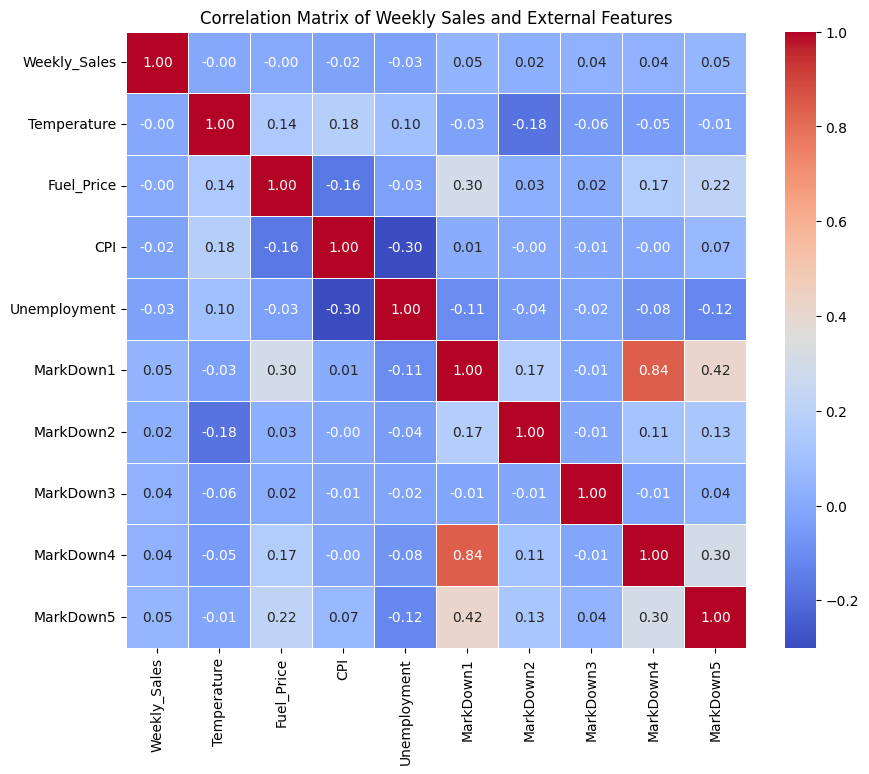

In [35]:
# Fill missing Markdown values with 0 as they likely represent no discount
df_train[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = df_train[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

# Select relevant features for correlation analysis
correlation_features = [
    'Weekly_Sales',
    'Temperature',
    'Fuel_Price',
    'CPI',
    'Unemployment',
    'MarkDown1',
    'MarkDown2',
    'MarkDown3',
    'MarkDown4',
    'MarkDown5'
]

# Calculate the correlation matrix
correlation_matrix = df_train[correlation_features].corr()

# Print the correlation of 'Weekly_Sales' with other features
print("\nCorrelation of Weekly_Sales with External Features:")
print(correlation_matrix['Weekly_Sales'].sort_values(ascending=False))

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Weekly Sales and External Features')
plt.show()

ვხედავთ **პირსონის კორელაციის ცხრილს**, სადაც მნიშვნელობები [-1; 1] შორის მერყეობს.
1 იდეალური დადებითი წრფივი კავშირის მიმანიშნებელია, -1 უარყოფითის, ხოლო 0 - კავშირის არარსებობის.

**MarkDown**-ებს მცირე დადებითი ეფექტი აქვთ.
მაკროეკონომიკური ინდიკატორები, როგორიცაა **CPI** და **უმუშევრობა**, ოდნავ უარყოფით, მაგრამ ძალიან სუსტ კორელაციას ავლენენ.
**საწვავის ფასი** და **ტემპერატურა** გაყიდვებზე გავლენას თითქმის არ ახდენს.

<Figure size 1200x600 with 0 Axes>

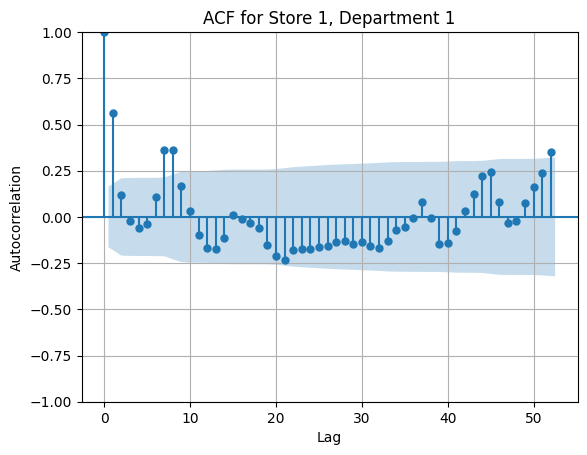

<Figure size 1200x600 with 0 Axes>

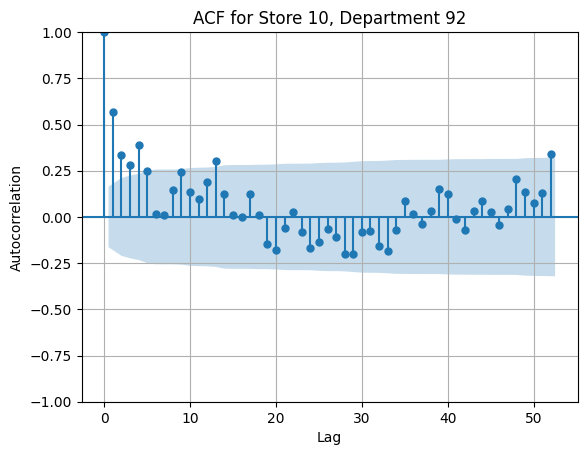

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

def plot_store_department_acf(df, store_id, department_id, max_lags=52):
  """
  Plots the Autocorrelation Function (ACF) for the weekly sales of a specific store and department.

  Args:
    df: DataFrame containing the sales data with 'Store', 'Dept', 'Date', and 'Weekly_Sales' columns.
    store_id: The Store ID to filter the data.
    department_id: The Department ID to filter the data.
    max_lags: The maximum number of lags to plot in the ACF graph.
  """
  # Filter data for the specific store and department
  store_dept_sales = df[(df['Store'] == store_id) & (df['Dept'] == department_id)].sort_values(by='Date')

  if store_dept_sales.empty:
    print(f"No data found for Store {store_id}, Department {department_id}")
    return

  # Select the Weekly_Sales time series
  time_series = store_dept_sales['Weekly_Sales']

  # Plot the ACF
  plt.figure(figsize=(12, 6))
  plot_acf(time_series, lags=max_lags, title=f'ACF for Store {store_id}, Department {department_id}')
  plt.xlabel('Lag')
  plt.ylabel('Autocorrelation')
  plt.grid(True)
  plt.show()

# Example Usage: Plot ACF for Store 1, Department 1
plot_store_department_acf(df_train, store_id=1, department_id=1)

# Example Usage: Plot ACF for Store 10, Department 92 (a highly profitable department)
plot_store_department_acf(df_train, store_id=10, department_id=92)


**ACF**, იგივე **ავტოკორელაციის ფუნქცია**, გვიჩვენებს, თუ რამდენად ჰგავს ახლანდელი დროის სერია საკუთარ თავს დროის სხვადასხვა მომენტში.

მაგალითად, ვხედავთ, რომ ACF 1 მაღალია. ეს ნიშნავს, რომ ამ კვირაში გაყიდვები მაღალ კორელაციაშია გასული კვირის გაყიდვებთან, რაც ლოგიკურიცაა.
ნახაზზე ორი random department/store არის გამოსახული. ორივეზე ACF 52 მაღალია, რაც **წლიურ სეზონურობაზე** მიუთითებს.


<Figure size 1200x600 with 0 Axes>

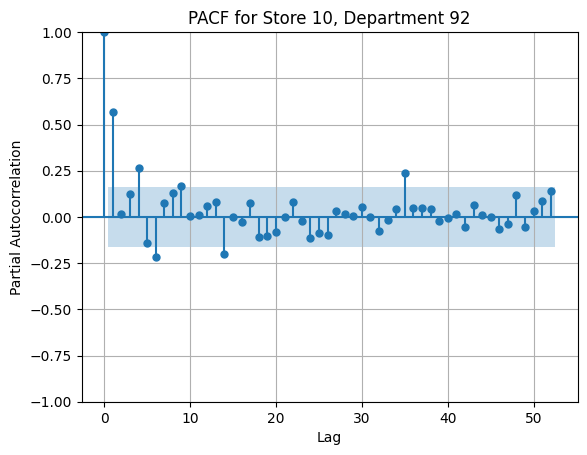

<Figure size 1200x600 with 0 Axes>

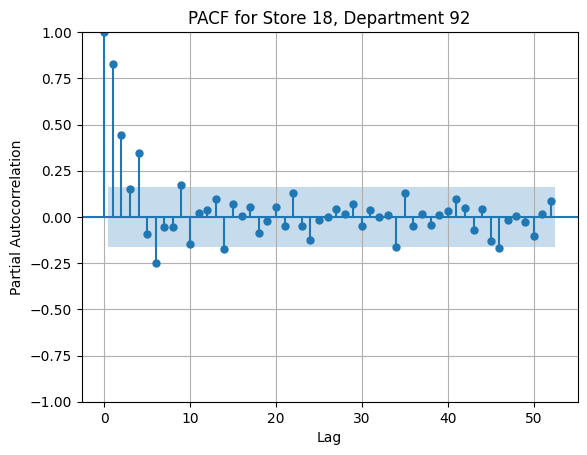

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf

def plot_store_department_pacf(df, store_id, department_id, max_lags=52):
  """
  Plots the Partial Autocorrelation Function (PACF) for the weekly sales of a specific store and department.

  Args:
    df: DataFrame containing the sales data with 'Store', 'Dept', 'Date', and 'Weekly_Sales' columns.
    store_id: The Store ID to filter the data.
    department_id: The Department ID to filter the data.
    max_lags: The maximum number of lags to plot in the PACF graph.
  """
  # Filter data for the specific store and department
  store_dept_sales = df[(df['Store'] == store_id) & (df['Dept'] == department_id)].sort_values(by='Date')

  if store_dept_sales.empty:
    print(f"No data found for Store {store_id}, Department {department_id}")
    return

  # Select the Weekly_Sales time series
  time_series = store_dept_sales['Weekly_Sales']

  # Plot the PACF
  plt.figure(figsize=(12, 6))
  plot_pacf(time_series, lags=max_lags, title=f'PACF for Store {store_id}, Department {department_id}')
  plt.xlabel('Lag')
  plt.ylabel('Partial Autocorrelation')
  plt.grid(True)
  plt.show()

# List of store IDs
store_ids = [10, 18]
department_id = 92

# Plot PACF for each store in department 92
for store_id in store_ids:
  plot_store_department_pacf(df_train, store_id=store_id, department_id=department_id)


**PACF** არის **ნაწილობრივი ავტოკორელაციის ფუნქცია.** ის ზომავს lag-ის პირდაპირ ეფექტს მიმდინარე მნიშვნელობაზე. ACF-გან განსხვავებით, რომელიც აჩვენებს სრულ კორელაციას, PACF გვაძლევს საშუალებას, გავიგოთ, თუ რამდენად უწყობს ხელს მხოლოდ lag k მიმდინარე ღირებულების პროგნოზირებას.

მაგალითად, თუ გვინდა გამოვიცნოთ გაყიდვები ამ კვირაში: ACF lag 2 შეიძლება მაღალი იყოს მხოლოდ იმიტომ, რომ lag 1 ძალიან მაღალ კორელაციაშია. PACF lag 2 კი გვეუბნება, გვაძლევს თუ არა lag 2 ახალ ინფორმაციას  lag 1-გან დამოუკიდებლად.

გრაფიკზე დაყრდნობით შეიძლება ითქვას, რომ lag 1-2-3 მნიშვნელოვანია და გამოგვადგება თუ ფიჩერებად დავამატებთ.

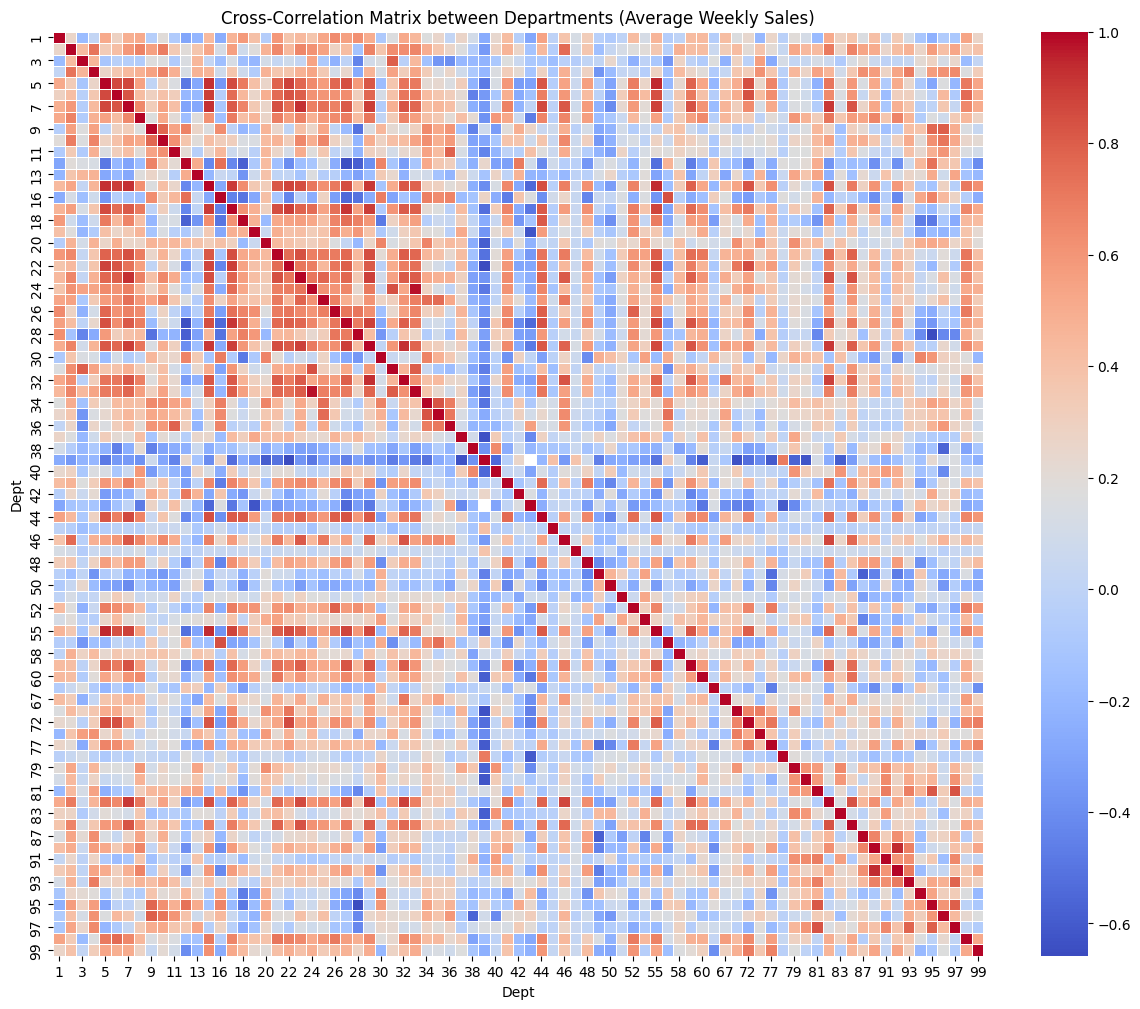

In [52]:
# Select relevant columns for department analysis
department_sales_df = df_train[['Date', 'Store', 'Dept', 'Weekly_Sales']].copy()

# We will use the average weekly sales per department per week across all stores
department_pivot = department_sales_df.groupby(['Date', 'Dept'])['Weekly_Sales'].mean().unstack()

# Calculate the correlation matrix between departments
department_correlation = department_pivot.corr()

# Visualize the cross-correlation matrix using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(department_correlation, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Cross-Correlation Matrix between Departments (Average Weekly Sales)')
plt.show()

In [53]:
# Stack the correlation matrix and remove self-correlations
stacked_correlation = department_correlation.stack()
# Remove correlations of a department with itself (which is always 1)
stacked_correlation = stacked_correlation[stacked_correlation.index.get_level_values(0) != stacked_correlation.index.get_level_values(1)]

# Get the absolute values for ranking by strength of correlation
abs_stacked_correlation = stacked_correlation.abs()

# Sort by absolute correlation in descending order
sorted_correlation = abs_stacked_correlation.sort_values(ascending=False)

top_n = 10  # You can adjust N as needed
top_correlated_pairs = []
seen_pairs = set()

for (dept1, dept2), corr_abs in sorted_correlation.items():
    if (dept2, dept1) not in seen_pairs:
        # Get the actual correlation value
        actual_corr = department_correlation.loc[dept1, dept2]
        top_correlated_pairs.append(((dept1, dept2), actual_corr))
        seen_pairs.add((dept1, dept2))
        if len(top_correlated_pairs) >= top_n:
            break

print(f"\nTop {top_n} Cross-Correlated Department Pairs (by absolute correlation):")
for pair, corr in top_correlated_pairs:
    print(f"Departments {pair[0]} and {pair[1]}: {corr:.4f}")

# Optional: You can also get the top N positively and negatively correlated pairs separately
print("\nTop 5 Positively Correlated Department Pairs:")
positive_corr = stacked_correlation.sort_values(ascending=False)
seen_pairs_pos = set()
top_pos = []
for (dept1, dept2), corr in positive_corr.items():
     if (dept2, dept1) not in seen_pairs_pos:
        top_pos.append(((dept1, dept2), corr))
        seen_pairs_pos.add((dept1, dept2))
        if len(top_pos) >= 5:
            break
for pair, corr in top_pos:
    print(f"Departments {pair[0]} and {pair[1]}: {corr:.4f}")


print("\nTop 5 Negatively Correlated Department Pairs:")
negative_corr = stacked_correlation.sort_values(ascending=True)
seen_pairs_neg = set()
top_neg = []
for (dept1, dept2), corr in negative_corr.items():
    if (dept2, dept1) not in seen_pairs_neg:
        top_neg.append(((dept1, dept2), corr))
        seen_pairs_neg.add((dept1, dept2))
        if len(top_neg) >= 5:
            break
for pair, corr in top_neg:
    print(f"Departments {pair[0]} and {pair[1]}: {corr:.4f}")


Top 10 Cross-Correlated Department Pairs (by absolute correlation):
Departments 24 and 33: 0.9765
Departments 55 and 5: 0.9427
Departments 92 and 90: 0.9385
Departments 55 and 14: 0.9371
Departments 32 and 29: 0.9289
Departments 7 and 23: 0.9274
Departments 5 and 14: 0.9266
Departments 14 and 7: 0.9264
Departments 17 and 27: 0.9103
Departments 14 and 29: 0.9088

Top 5 Positively Correlated Department Pairs:
Departments 33 and 24: 0.9765
Departments 5 and 55: 0.9427
Departments 92 and 90: 0.9385
Departments 14 and 55: 0.9371
Departments 29 and 32: 0.9289

Top 5 Negatively Correlated Department Pairs:
Departments 95 and 28: -0.6579
Departments 22 and 39: -0.6546
Departments 27 and 12: -0.6441
Departments 37 and 39: -0.6383
Departments 39 and 71: -0.6344


ვნახოთ დეპარტამენტებს შორის კორელაცია. გრაფიკზე რთულია გარჩევა, მაგრამ რიცხვობრივად ზოგიერთს შორის ვხედავთ 95-95% მსგავსებას.

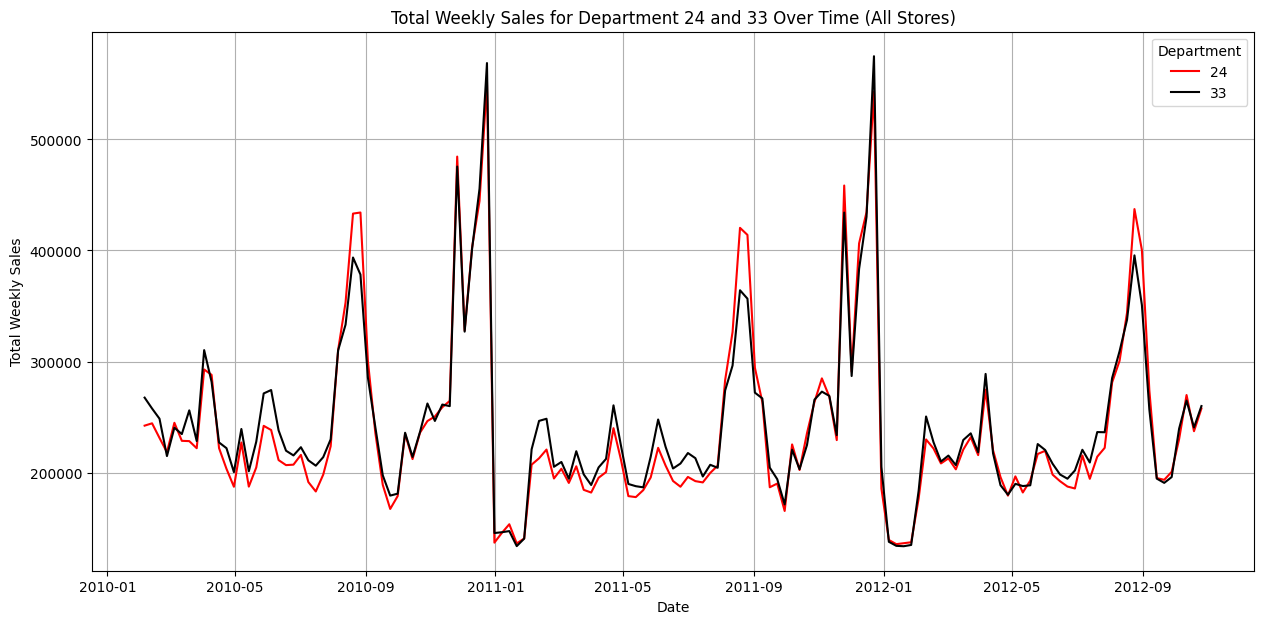

In [57]:
# Filter data for departments 24 and 33
df_dept_24_33 = df_train[df_train['Dept'].isin([24, 33])].copy()

# Group by Date and Department and sum weekly sales across all stores
weekly_sales_dept = df_dept_24_33.groupby(['Date', 'Dept'])['Weekly_Sales'].sum().reset_index()

# Plotting Weekly Sales for Department 24 and 33 Over Time
plt.figure(figsize=(15, 7))
sns.lineplot(data=weekly_sales_dept, x='Date', y='Weekly_Sales', hue='Dept', palette=['red', 'black'])
plt.title('Total Weekly Sales for Department 24 and 33 Over Time (All Stores)')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.legend(title='Department')
plt.show()

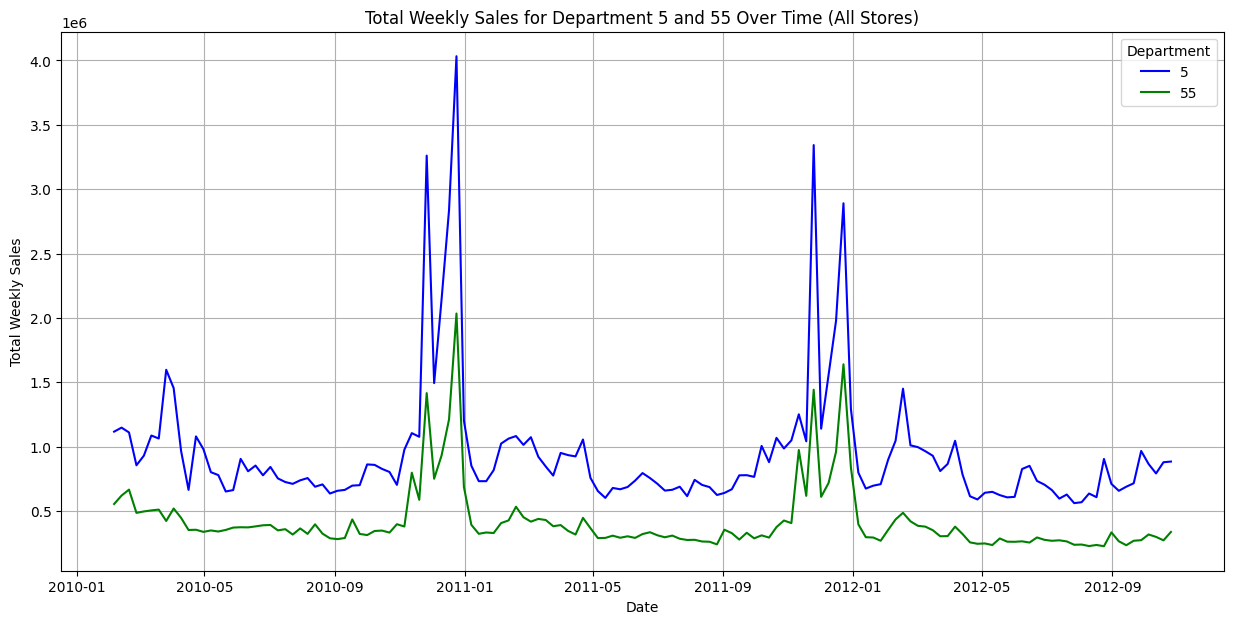

In [60]:
# Filter data for departments 5 and 55
df_dept_5_55 = df_train[df_train['Dept'].isin([5, 55])].copy()

# Group by Date and Department and sum weekly sales across all stores
weekly_sales_dept_5_55 = df_dept_5_55.groupby(['Date', 'Dept'])['Weekly_Sales'].sum().reset_index()

# Plotting Weekly Sales for Department 5 and 55 Over Time
plt.figure(figsize=(15, 7))
sns.lineplot(data=weekly_sales_dept_5_55, x='Date', y='Weekly_Sales', hue='Dept', palette=['blue', 'green'])
plt.title('Total Weekly Sales for Department 5 and 55 Over Time (All Stores)')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.legend(title='Department')
plt.show()

24 და 33 გაყიდვები ძალიან მსგავსია როგორც პატერნით (98% კორელაცია), ასევე მაგნიტუდით, რასაც ვერ ვიტყვით 5-55 დეპარტამენტებზე - უკანასკნელი გაყიდვებით საკმაოდ ჩამორჩება საწყისს.  